In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
example = 'laplace'
script = 'generate_example'

In [3]:
import os
matlab_path = "/Applications/MATLAB_R2022a.app/bin/matlab"
examplematlab = "\'"+example+"\'"
matlabcmd = f"{matlab_path} -nodisplay -nosplash -nodesktop -r \"{script}({examplematlab}); exit;\" | tail -n +11"
with open("temp.sh", 'w') as f:
    f.write(matlabcmd)
    f.close()
os.system(f"bash temp.sh")
os.remove("temp.sh")

rosetta error: Attachment of code signature supplement failed: 1 
 /var/db/oah/742b2aa312f0503b977e16502ddd8b72b628442f15dacb71f7712845830f15fb/13580dcd5197fcac7f6ed8c31992d3003d7a59e9fc9d4ceb0bc7049ba44493b6/libtbb.dylib.aot

In [4]:
data = DataProcessor("datasets/laplace/data.mat")
data.generateDataset(valRatio = 0.95, batch_size = 1024)

Metal device set to: Apple M1 Pro


In [5]:
model = GreenNN()
model.build()

Using tensorflow 2.9.0


In [6]:
lossHistory = model.train(data, epochs = 3000)

Loss at epoch 100: Training = 5.984E-02, Validation = 4.253E-02
Loss at epoch 200: Training = 1.720E-02, Validation = 1.661E-02
Loss at epoch 300: Training = 5.361E-03, Validation = 5.008E-03
Loss at epoch 400: Training = 3.239E-03, Validation = 2.953E-03
Loss at epoch 500: Training = 2.209E-03, Validation = 2.074E-03
Loss at epoch 600: Training = 1.773E-03, Validation = 1.602E-03
Loss at epoch 700: Training = 2.372E-03, Validation = 2.481E-03
Loss at epoch 800: Training = 6.743E-03, Validation = 7.649E-03
Loss at epoch 900: Training = 9.534E-04, Validation = 8.470E-04
Loss at epoch 1000: Training = 8.614E-04, Validation = 7.574E-04
Loss at epoch 1100: Training = 7.229E-04, Validation = 6.286E-04
Loss at epoch 1200: Training = 6.005E-04, Validation = 5.030E-04
Loss at epoch 1300: Training = 1.353E-03, Validation = 1.501E-03
Loss at epoch 1400: Training = 4.631E-04, Validation = 3.731E-04
Loss at epoch 1500: Training = 5.055E-04, Validation = 3.864E-04
Loss at epoch 1600: Training = 3.7

In [7]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

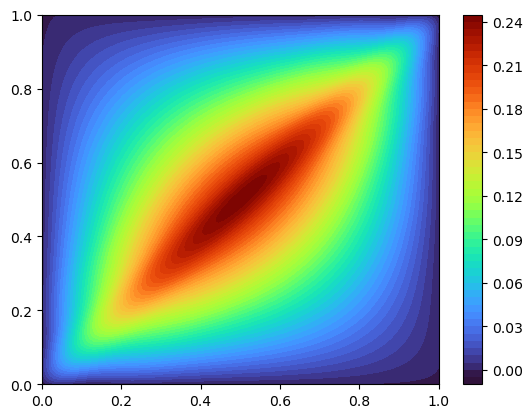

In [8]:
plt.figure()
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

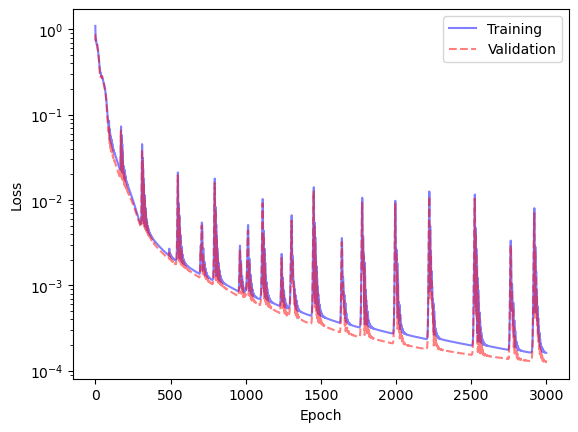

In [9]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

In [10]:
model.saveModels('savedModels/laplace')

INFO:tensorflow:Assets written to: savedModels/laplace/G/assets
INFO:tensorflow:Assets written to: savedModels/laplace/N/assets
